***Import `libraries` *** 




In [78]:
import numpy as np
import pandas as pd
import re
import os


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})


#***Mount the Google drive to the Colab notebook***

In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


#***Download data from Kaggle***

In [3]:
! pip install kaggle 
%cd /content/gdrive/MyDrive/covid19_impact_on_digital_learning

/content/gdrive/MyDrive/covid19_impact_on_digital_learning


In [48]:
%cd /content/gdrive/MyDrive/covid19_impact_on_digital_learning
ls




/content/gdrive/MyDrive/covid19_impact_on_digital_learning


NameError: ignored

In [46]:
#configure the path to “kaggle.json”
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/covid19_impact_on_digital_learning/new"

In [43]:
pwd

'/content/gdrive/MyDrive/covid19_impact_on_digital_learning/new'

In [47]:
!kaggle competitions download -c learnplatform-covid19-impact-on-digital-learning
kaggle competitions download -c learnplatform-covid19-impact-on-digital-learning

  0% 0.00/412k [00:00<?, ?B/s]
100% 412k/412k [00:00<00:00, 25.9MB/s]
  0% 0.00/772k [00:00<?, ?B/s]
100% 772k/772k [00:00<00:00, 50.1MB/s]
  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 47.9MB/s]
  0% 0.00/243k [00:00<?, ?B/s]
100% 243k/243k [00:00<00:00, 32.1MB/s]
  0% 0.00/222k [00:00<?, ?B/s]
100% 222k/222k [00:00<00:00, 31.4MB/s]
  0% 0.00/942k [00:00<?, ?B/s]
100% 942k/942k [00:00<00:00, 61.9MB/s]
  0% 0.00/625k [00:00<?, ?B/s]
100% 625k/625k [00:00<00:00, 41.3MB/s]
  0% 0.00/566k [00:00<?, ?B/s]
100% 566k/566k [00:00<00:00, 32.5MB/s]
  0% 0.00/514k [00:00<?, ?B/s]
100% 514k/514k [00:00<00:00, 48.9MB/s]
  0% 0.00/405k [00:00<?, ?B/s]
100% 405k/405k [00:00<00:00, 6.46MB/s]
  0% 0.00/1.08M [00:00<?, ?B/s]
100% 1.08M/1.08M [00:00<00:00, 35.5MB/s]
  0% 0.00/1.44M [00:00<?, ?B/s]
100% 1.44M/1.44M [00:00<00:00, 47.3MB/s]
  0% 0.00/706k [00:00<?, ?B/s]
100% 706k/706k [00:00<00:00, 40.6MB/s]
  0% 0.00/827k [00:00<?, ?B/s]
100% 827k/827k [00:00<00:00, 54.1MB/s]
  0% 0.00/989k

In [49]:
ls

 1000.csv   1142.csv   1444.csv   1558.csv   districts_info.csv    README.md
 1039.csv   1179.csv   1450.csv   1570.csv  'Learning _Doc.gdoc'
 1044.csv   1204.csv   1470.csv   1584.csv   learnplatform.zip
 1052.csv   1270.csv   1536.csv   1624.csv   new/
 1131.csv   1324.csv   1549.csv   1705.csv   products_info.csv


In [5]:
import pandas as pd

products_info =pd.read_csv("products_info.csv") #information about the top 370 tools used for digital learning
districts_info = pd.read_csv("districts_info.csv") # information about each school district 

In [50]:
!apt install unzip
!unzip learnplatform.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Archive:  learnplatform.zip
replace README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace districts_info.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: engagement_data/1000.csv  
  inflating: engagement_data/1039.csv  
  inflating: engagement_data/1044.csv  
  inflating: engagement_data/1052.csv  
  inflating: engagement_data/1131.csv  
  inflating: engagement_data/1142.csv  
  inflating: engagement_data/1179.csv  
  inflating: engagement_data/1204.csv  
  inflating: engagement_data/1270.csv  
  inflating: engagement_data/1324.csv  
  inflating: engagement_data/1444.csv  
  inflating: engagement_data/1450.csv  
  inflating: en

In [ ]:
districts_info

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


##***Preprocessing***

1-Dropping Districts with NaN States



In [6]:
 districts_info.state.notna()

0       True
1      False
2       True
3      False
4      False
       ...  
228     True
229     True
230     True
231     True
232     True
Name: state, Length: 233, dtype: bool

In [7]:
districts_info = districts_info[districts_info.state.notna()].reset_index(drop=True)

In [8]:
districts_info

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
2,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
3,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
4,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
...,...,...,...,...,...,...,...
171,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
172,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
173,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
174,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


2-One-Hot Encoding the Product Sectors



In [9]:
products_info

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
...,...,...,...,...,...,...
367,88065,https://dochub.com/,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO - Other
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation
369,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,PreK-12; Higher Ed,"LC - Sites, Resources & Reference - Games & Si..."
370,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN


In [11]:
temp_sectors=products_info['Sector(s)'].str.get_dummies(sep="; ") #seperate the string at each ;
temp_sectors.columns

Index(['Corporate', 'Higher Ed', 'PreK-12'], dtype='object')

In [13]:
temp_sectors.columns = [f"sector_{re.sub(' ', '', c)}" for c in temp_sectors.columns]
temp_sectors

,sector_sector_Corporate,sector_sector_HigherEd,sector_sector_PreK-12
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,1
4,0,0,1
...,...,...,...
367,1,1,1
368,1,1,1
369,0,1,1
370,0,0,0


In [14]:
temp_sectors = products_info['Sector(s)'].str.get_dummies(sep="; ") #seperate the string at each ;
temp_sectors.columns = [f"sector_{re.sub(' ', '', c)}" for c in temp_sectors.columns] #replace columns names resulted with sector_colname without spaces.
products_info = products_info.join(temp_sectors)
products_info.drop("Sector(s)", axis=1, inplace=True)

del temp_sectors

In [15]:
products_info

,LP ID,URL,Product Name,Provider/Company Name,Primary Essential Function,sector_Corporate,sector_HigherEd,sector_PreK-12
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,LC - Digital Learning Platforms,0,0,1
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",LC - Digital Learning Platforms,0,0,1
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC","LC - Sites, Resources & Reference - Games & Si...",0,0,1
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,LC - Digital Learning Platforms,0,1,1
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,LC - Digital Learning Platforms,0,0,1
...,...,...,...,...,...,...,...,...
367,88065,https://dochub.com/,DocHub,DocHub,SDO - Other,1,1,1
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,LC - Content Creation & Curation,1,1,1
369,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,"LC - Sites, Resources & Reference - Games & Si...",0,1,1
370,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,0,0,0


3-Splitting up the Primary Essential Function



In [16]:
products_info['Primary Essential Function'].apply(lambda x: x.split(' - ')[0] if x == x else x)

0       LC
1       LC
2       LC
3       LC
4       LC
      ... 
367    SDO
368     LC
369     LC
370    NaN
371    NaN
Name: Primary Essential Function, Length: 372, dtype: object

In [21]:
products_info['primary_function_main'] = products_info['Primary Essential Function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
products_info['primary_function_sub'] = products_info['Primary Essential Function'].apply(lambda x: x.split(' - ')[1] if x == x else x)

# Synchronize similar values
products_info['primary_function_sub'] = products_info['primary_function_sub'].replace({'Sites, Resources & References' : 'Sites, Resources & Reference'})
products_info.drop("Primary Essential Function", axis=1, inplace=True)

In [22]:
products_info

,LP ID,URL,Product Name,Provider/Company Name,sector_Corporate,sector_HigherEd,sector_PreK-12,primary_function_sub,primary_function_main
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,0,0,1,Digital Learning Platforms,LC
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",0,0,1,Digital Learning Platforms,LC
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",0,0,1,"Sites, Resources & Reference",LC
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,0,1,1,Digital Learning Platforms,LC
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,0,0,1,Digital Learning Platforms,LC
...,...,...,...,...,...,...,...,...,...
367,88065,https://dochub.com/,DocHub,DocHub,1,1,1,Other,SDO
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,1,1,1,Content Creation & Curation,LC
369,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,0,1,1,"Sites, Resources & Reference",LC
370,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,0,0,0,NaN,NaN


In [23]:
districts_info

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
2,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
3,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
4,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
...,...,...,...,...,...,...,...
171,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
172,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
173,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
174,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


4- Concatenation


In [54]:
directory = os.getcwd()
directory


In [57]:
PATH = '/content/gdrive/MyDrive/covid19_impact_on_digital_learning/engagement_data' 

temp = []

for district in districts_info.district_id.unique():
    df = pd.read_csv(f'{PATH}/{district}.csv', index_col=None, header=0)
    df["district_id"] = district
    if df.time.nunique() == 366:
        temp.append(df)

engagement = pd.concat(temp)
engagement = engagement.reset_index(drop=True)

# Only consider districts with full 2020 engagement data
districts_info = districts_info[districts_info.district_id.isin(engagement.district_id.unique())].reset_index(drop=True)
products_info = products_info[products_info['LP ID'].isin(engagement.lp_id.unique())].reset_index(drop=True)

In [58]:
products_info

,LP ID,URL,Product Name,Provider/Company Name,sector_Corporate,sector_HigherEd,sector_PreK-12,primary_function_sub,primary_function_main
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,0,0,1,Digital Learning Platforms,LC
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",0,0,1,Digital Learning Platforms,LC
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",0,0,1,"Sites, Resources & Reference",LC
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,0,1,1,Digital Learning Platforms,LC
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,0,0,1,Digital Learning Platforms,LC
...,...,...,...,...,...,...,...,...,...
364,24396,https://www.mathsisfun.com/,Math is Fun,Mathsisfun.com,0,0,1,"Sites, Resources & Reference",LC
365,22241,https://www.history.com/,History.com,"A&E Television Networks, LLC",0,1,1,"Sites, Resources & Reference",LC
366,93376,https://www.cultofpedagogy.com/,Cult of Pedagogy,Cult of Pedagogy,0,0,1,Teacher Resources,CM
367,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,0,1,1,"Sites, Resources & Reference",LC


In [59]:
print(len(engagement))
engagement = engagement[engagement.lp_id.isin(products_info['LP ID'].unique())]
print(len(engagement))

14913939
7784803


In [60]:
engagement

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,15254.0,0.21,2.07,3710
2,2020-01-01,32213.0,0.62,12.40,3710
3,2020-01-01,16633.0,0.21,2.07,3710
4,2020-01-01,94324.0,0.21,6.20,3710
5,2020-01-01,64948.0,0.21,2.07,3710
...,...,...,...,...,...
14913930,2020-12-31,28504.0,0.05,10.46,7164
14913931,2020-12-31,69827.0,0.35,24.81,7164
14913932,2020-12-31,52758.0,0.01,0.09,7164
14913937,2020-12-31,61945.0,0.29,16.06,7164


In [61]:
engagement.time = engagement.time.astype('datetime64[ns]')
engagement

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,15254.0,0.21,2.07,3710
2,2020-01-01,32213.0,0.62,12.40,3710
3,2020-01-01,16633.0,0.21,2.07,3710
4,2020-01-01,94324.0,0.21,6.20,3710
5,2020-01-01,64948.0,0.21,2.07,3710
...,...,...,...,...,...
14913930,2020-12-31,28504.0,0.05,10.46,7164
14913931,2020-12-31,69827.0,0.35,24.81,7164
14913932,2020-12-31,52758.0,0.01,0.09,7164
14913937,2020-12-31,61945.0,0.29,16.06,7164


###**Exploratory Data Analysis**

In [65]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
        'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


districts_info['state_abbrev'] = districts_info['state'].replace(us_state_abbrev)
districts_info_by_state = districts_info['state_abbrev'].value_counts().to_frame().reset_index(drop=False)
districts_info_by_state.columns = ['state_abbrev', 'num_districts']


In [68]:
districts_info

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,state_abbrev
0,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",UT
1,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000[",NC
2,9812,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000[",UT
3,6584,North Carolina,Rural,"[0.4, 0.6[","[0.6, 0.8[","[0.18, 1[","[8000, 10000[",NC
4,1044,Missouri,Suburb,"[0, 0.2[","[0, 0.2[",NaN,"[10000, 12000[",MO
...,...,...,...,...,...,...,...,...
128,5882,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",MA
129,1705,Washington,City,"[0.2, 0.4[","[0.4, 0.6[","[0.18, 1[","[12000, 14000[",WA
130,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000[",VA
131,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN,CA


In [69]:
fig = go.Figure()
layout = dict(
    title_text = "Number of Available School Districts per State",
    geo_scope='usa',
)
fig.add_trace(
    go.Choropleth(
        locations=districts_info_by_state.state_abbrev,
        zmax=1,
        z = districts_info_by_state.num_districts,
        locationmode = 'USA-states', # set of locations match entries in `locations`
        marker_line_color='white',
        geo='geo',
        colorscale=px.colors.sequential.Teal, 
    )
)
            
fig.update_layout(layout)   
fig.show()

In [74]:
districts_info.pp_total_raw.unique()
temp = districts_info.groupby('locale').pp_total_raw.value_counts().to_frame()
temp.columns = ['amount']

temp = temp.reset_index(drop=False)

temp = temp.pivot(index='locale', columns='pp_total_raw')['amount']

temp

pp_total_raw,"[10000, 12000[","[12000, 14000[","[14000, 16000[","[16000, 18000[","[18000, 20000[","[20000, 22000[","[22000, 24000[","[4000, 6000[","[6000, 8000[","[8000, 10000["
locale,,,,,,,,,,
City,2.0,2.0,1.0,NaN,3.0,NaN,NaN,NaN,1.0,3.0
Rural,1.0,2.0,NaN,2.0,NaN,NaN,1.0,NaN,1.0,5.0
Suburb,6.0,7.0,9.0,7.0,2.0,1.0,1.0,2.0,8.0,9.0
Town,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


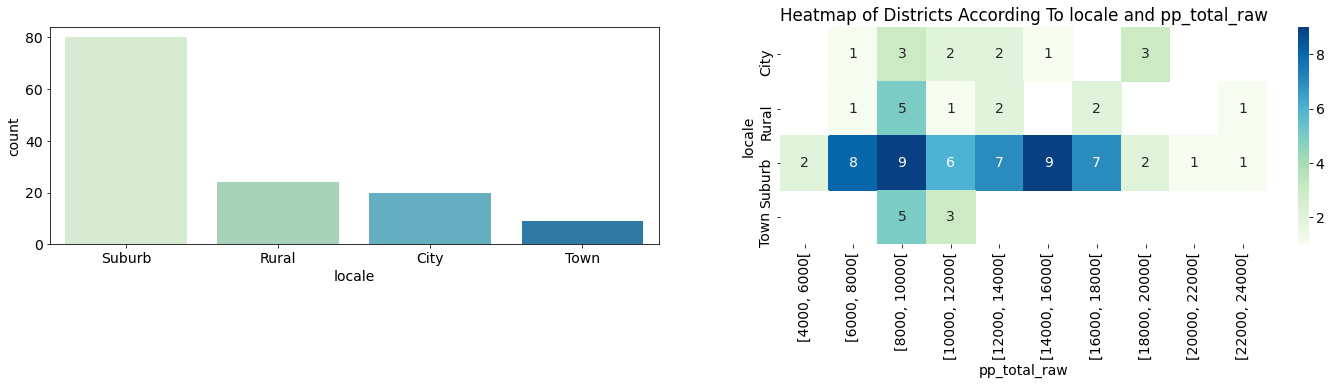

In [79]:
temp = temp[['[4000, 6000[', '[6000, 8000[', '[8000, 10000[', '[10000, 12000[',
       '[12000, 14000[', '[14000, 16000[', '[16000, 18000[', 
       '[18000, 20000[', '[20000, 22000[', '[22000, 24000[', ]]

fig, ax = plt.subplots(1, 2, figsize=(24,4))

sns.countplot(data=districts_info, x='locale', ax=ax[0], palette='GnBu')

sns.heatmap(temp, annot=True,  cmap='GnBu', ax=ax[1])
ax[1].set_title('Heatmap of Districts According To locale and pp_total_raw')
plt.show()

In [80]:
def replace_ranges_pct(range_str):
    if range_str == '[0, 0.2[':
        return 0.1
    elif range_str == '[0.2, 0.4[':
        return 0.3
    elif range_str == '[0.4, 0.6[':
        return 0.5
    elif range_str == '[0.6, 0.8[':
        return 0.7
    elif range_str == '[0.8, 1[':
        return 0.9
    else:
        return np.nan
def replace_ranges_raw(range_str):
    if range_str == '[4000, 6000[':
        return 5000
    elif range_str == '[6000, 8000[':
        return 7000
    elif range_str == '[8000, 10000[':
        return 9000
    elif range_str == '[10000, 12000[':
        return 11000
    elif range_str ==  '[12000, 14000[':
        return 13000
    elif range_str ==  '[14000, 16000[':
        return 15000
    elif range_str == '[16000, 18000[':
        return 17000
    elif range_str ==  '[18000, 20000[':
        return 19000
    elif range_str ==  '[20000, 22000[':
        return 21000
    elif range_str ==  '[22000, 24000[':
        return 21000
    else: 
        return np.nan
districts_info['pct_black_hispanic_num'] = districts_info['pct_black/hispanic'].apply(lambda x: replace_ranges_pct(x))
districts_info['pct_free_reduced_num'] = districts_info['pct_free/reduced'].apply(lambda x: replace_ranges_pct(x))
districts_info['pp_total_raw_num'] = districts_info['pp_total_raw'].apply(lambda x: replace_ranges_raw(x))

def plot_state_mean_for_var(col):
    temp = districts_info.groupby('state_abbrev')[col].mean().to_frame().reset_index(drop=False)

    fig = go.Figure()
    layout = dict(
        title_text = f"Mean {col} per State",
        geo_scope='usa',
    )
    fig.add_trace(
        go.Choropleth(
            locations=temp.state_abbrev,
            zmax=1,
            z = temp[col],
            locationmode = 'USA-states', # set of locations match entries in `locations`
            marker_line_color='white',
            geo='geo',
            colorscale=px.colors.sequential.Teal, 
        )
    )

    fig.update_layout(layout)   
    fig.show()

plot_state_mean_for_var('pct_black_hispanic_num')
plot_state_mean_for_var('pct_free_reduced_num')
plot_state_mean_for_var('pp_total_raw_num')

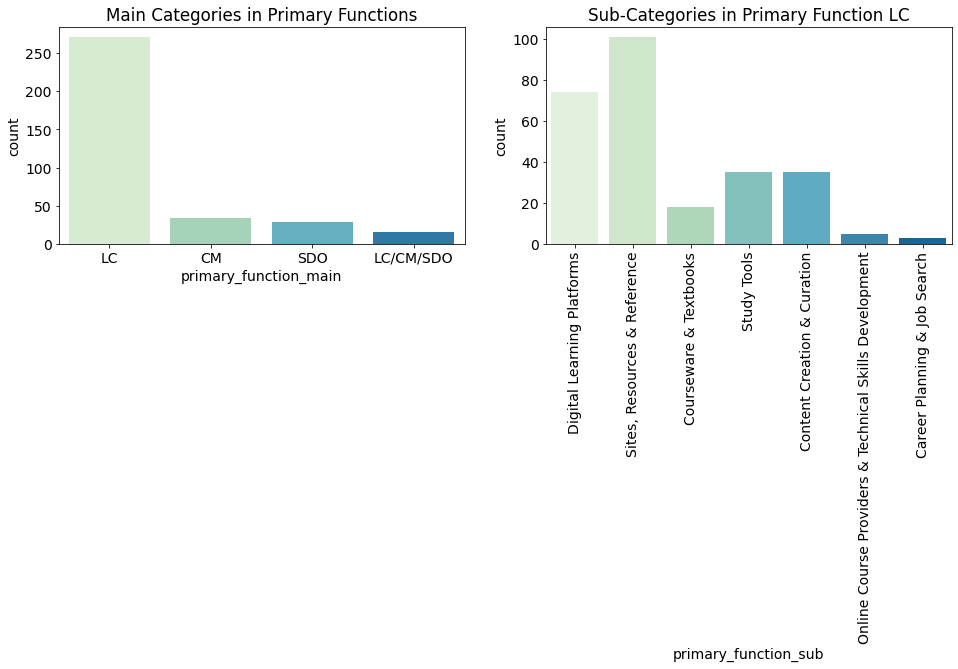

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(data=products_info, x='primary_function_main', palette ='GnBu', ax=ax[0])
ax[0].set_title('Main Categories in Primary Functions')

sns.countplot(data=products_info[products_info.primary_function_main == 'LC'], x='primary_function_sub', palette ='GnBu', ax=ax[1])
ax[1].set_title('Sub-Categories in Primary Function LC')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()

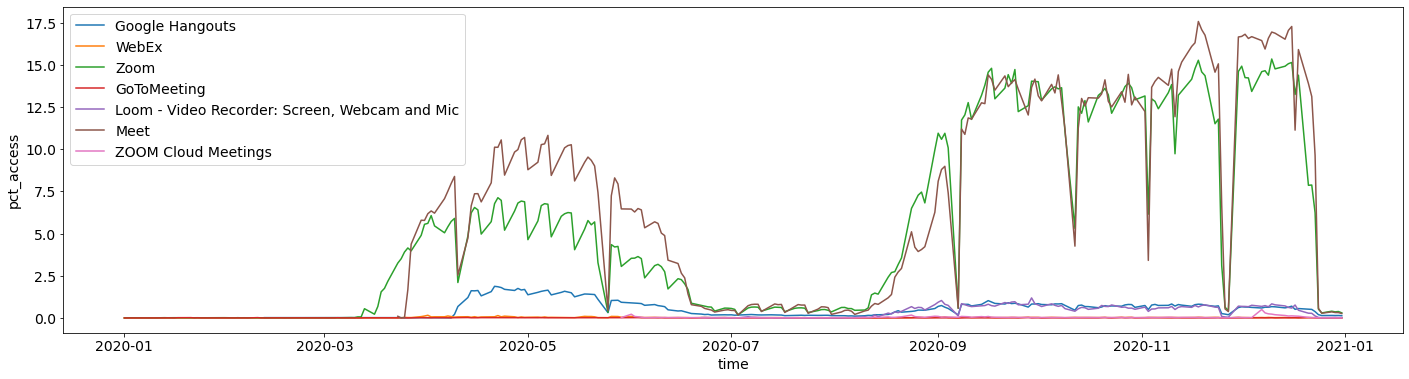

In [94]:
virtual_classroom_lp_id = products_info[products_info.primary_function_sub == 'Virtual Classroom']['LP ID'].unique()

# Remove weekends from the dataframe
engagement['weekday'] = pd.DatetimeIndex(engagement['time']).weekday
engagement_without_weekends = engagement[engagement.weekday < 5]

# Figure 1
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
for virtual_classroom_product in virtual_classroom_lp_id:
    temp = engagement_without_weekends[engagement_without_weekends.lp_id == virtual_classroom_product].groupby('time').pct_access.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=temp.time, y=temp.pct_access, label=products_info[products_info['LP ID'] == virtual_classroom_product]['Product Name'].values[0])
plt.legend()
plt.show()



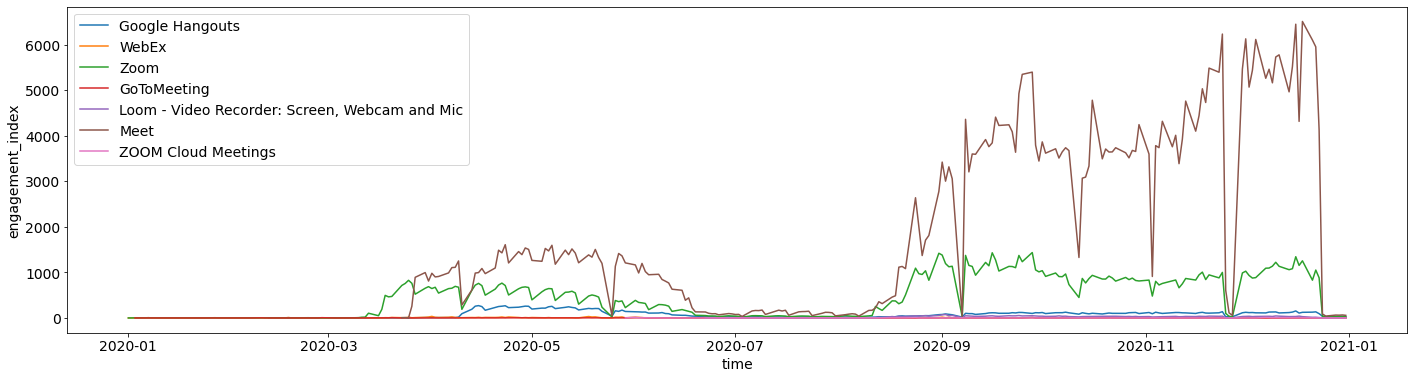

In [95]:
# Figure 2
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
for virtual_classroom_product in virtual_classroom_lp_id:
    temp = engagement_without_weekends[engagement_without_weekends.lp_id == virtual_classroom_product].groupby('time').engagement_index.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=temp.time, y=temp.engagement_index, label=products_info[products_info['LP ID'] == virtual_classroom_product]['Product Name'].values[0])
plt.legend()
plt.show()